In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as ss
import random

def direction(a):
    if a == 1:  # North
        cord = pd.DataFrame([[0, 10, 10]], columns=list('XYD'))
    elif a == 2:  # South
        cord = pd.DataFrame([[0, -10, 10]], columns=list('XYD'))
    elif a == 3:  # East
        cord = pd.DataFrame([[10, 0, 10]], columns=list('XYD'))
    elif a == 4:  # West
        cord = pd.DataFrame([[-10, 0, 10]], columns=list('XYD'))
    else:
        raise ValueError("Enter Number between 1-4")
    return cord

def function(x,y):  # Need co-ordinates that gives value less than 400 as food is in closed boundary #circle at centre 20cm r
    return (x**2)+(y**2)

initial_cordinate = pd.DataFrame([[0, 0, 0]], columns=list('XYD'))

In [2]:
def time():
    ap = pd.DataFrame()
    cordinate = initial_cordinate
    for i in range(1, 100):
        number = random.randint(1, 4)
        cordinate = cordinate+direction(number)
        data = cordinate
        k = data.iloc[:, :2]
        x=k.iloc[:,0][0]
        y=k.iloc[:,1][0]
        j = function(x,y) 
        if j < 400: #Checing the condition if the fuction returns value less than 400, then i am at my food
            cordinate = initial_cordinate
            ap = ap.append(data)
        else:
            pass
    return ap

In [3]:
t = pd.DataFrame()

In [4]:
for a in range(0, 100):
    y = time()
    if y.empty:
        pass
    else:
        y = y.iloc[:, 2]
        y = pd.Series(y.mean())
        t = t.append(y/10, ignore_index=True)
        a = a+1

In [5]:
t.columns = ['Time'] 

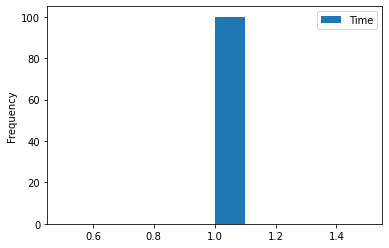

In [6]:
t.plot.hist() # Distribution As we can see for the closed bounday one leap will give you food stated boundary starts at 10cm
# As I am not consisdering the real number in decimal place as one leap is of 10cm minimum. Half leap is not allowed

In [7]:
t.mean() #Answer Average time 

Time    1.0
dtype: float64

In [8]:
t.std()

Time    0.0
dtype: float64

In [9]:
CI_u, CI_l = (t.mean()+1.96*((t.std())/np.sqrt(len(t)))
              ), (t.mean()-1.96*((t.std())/np.sqrt(len(t))))

In [10]:
CI_u, CI_l

(Time    1.0
 dtype: float64,
 Time    1.0
 dtype: float64)

In [11]:
t.median()

Time    1.0
dtype: float64